# TextData 
## Data Cleaning

### 英文

In [3]:
import html
from html.parser import HTMLParser
import string
import re
import itertools
from autocorrect import Speller
import nltk
from nltk.corpus import stopwords

# tweet="I enjoyd the event which took place yesteday & I lovdddd itttt ! The link to the show is http://t.co/4ftYom0i It's awesome you'll luv it #HadFun #Enjoyed BFN GN"



In [4]:
#读入文件
import csv
import itertools
def _read_file(input_file, quotechar=None):
    with open(input_file, 'r', encoding='utf-8') as f:
        reader = csv.reader(f, delimiter='\t', quotechar=quotechar)
        lines = []
        for line in reader:
            if sys.version_info[0] == 2:
                line = list(unicode(cell, 'utf-8') for cell in line)
            lines.append(line)
        content=''.join(list(itertools.chain(*lines)))
    return content

In [5]:
a=_read_file('Chinese_text.txt')
a

'乳腺癌是乳腺上皮细胞在多种致癌因子的作用下，发生增殖失控的现象。疾病早期常表现为乳房肿块、乳头溢液、腋窝淋巴结肿大等症状，晚期可因癌细胞发生远处转移，出现多器官病变，直接威胁患者的生命。乳腺癌常被称为“粉红杀手”，其发病率位居女性恶性肿瘤的首位，男性乳腺癌较为少见。随着医疗水平的提高，乳腺癌已成为疗效最佳的实体肿瘤之一。宫颈癌和乳腺癌并称女性两大“隐性杀手”。结核病是由结核分枝杆菌引起的慢性传染病，可侵及许多脏器，以肺部结核感染最为常见。排菌者为其重要的传染源。人体感染结核菌后不一定发病，当抵抗力降低或细胞介导的变态反应增高时，才可能引起临床发病。若能及时诊断，并予合理治疗，大多可获临床痊愈。'

In [4]:
b=_read_file('text2.txt')
b

"I enjoyd the event which took place yesteday & I lovdddd itttt ! The link to the show is http://t.co/4ftYom0i It's awesome you'll luv it #HadFun #Enjoyed BFN GNBest of all, NLTK is a free, open source, community-driven project.NLTK has been called “a wonderful tool for teaching, and working in, computational linguistics using Python,” and “an amazing library to play with natural language.”"

In [5]:
e=_read_file('text3.txt')
e

'Python is a high-level, interpreted, interactive and object-oriented scripting language. Python is designed to be highly readable. It uses English keywords frequently where as other languages use punctuation, and it has fewer syntactical constructions than other languages.Python was developed by Guido van Rossum in the late eighties and early nineties at the National Research Institute for Mathematics and Computer Science in the Netherlands.Python is derived from many other languages, including ABC, Modula-3, C, C++, Algol-68, SmallTalk, and Unix shell and other scripting languages.Python is copyrighted. Like Perl, Python source code is now available under the GNU General Public License (GPL).Python is now maintained by a core development team at the institute, although Guido van Rossum still holds a vital role in directing its progress.Another input is the mask image (cloud.png). The final Result is on the right side.'

In [6]:
#去掉网址，#等非英文字符的内容
def rm_nontext(text):
    text_rmurl=html.unescape(text)
    text = re.sub(r'https?:\/\/.\S+', "", text_rmurl)
    text = re.sub(r'#', '', text)
    text = re.sub(r'^RT[\s]+', '', text)
    return text

tweet_rm1=rm_nontext(b)
print(tweet_rm1)


I enjoyd the event which took place yesteday & I lovdddd itttt ! The link to the show is  It's awesome you'll luv it HadFun Enjoyed BFN GNBest of all, NLTK is a free, open source, community-driven project.NLTK has been called “a wonderful tool for teaching, and working in, computational linguistics using Python,” and “an amazing library to play with natural language.”


In [7]:
 #缩写还原,用完整全称替换;分开单词,比如forthewin;统一转换为小写；俚语转换；词形还原；拼写检查
def conv_text(text):
    Apos_dict={"'s":" is","n't":" not","'m":" am","'ll":" will",
            "'d":" would","'ve":" have","'re":" are"}
    for key,value in Apos_dict.items():
        if key in text:
            text=text.replace(key,value)        
        
    text = " ".join([s for s in re.split("([A-Z][a-z]+[^A-Z]*)",text) if s])

    text=text.lower()

    file=open("./slang.txt","r")
    slang=file.read()
    slang=slang.split('\n')
    text_tokens=text.split()
    slang_word=[]
    meaning=[]

    for line in slang:
        temp=line.split("=")
        slang_word.append(temp[0])
        meaning.append(temp[-1])

    for i,word in enumerate(text_tokens):
        if word in slang_word:
            idx=slang_word.index(word)
            text_tokens[i]=meaning[idx]
            
    text=" ".join(text_tokens)

    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    spell = Speller(lang='en')
    #spell check
    text=spell(text)
    return text
tweet_rm2=conv_text(tweet_rm1)
print(tweet_rm2)

i enjoyed the event which took place yesterday & i loved itt ! the link to the show is it is awesome you will luv it had fun enjoyed bin gn best of all, lt is a free, open source, community-driven project.lt has been called “a wonderful tool for teaching, and working in, computational linguistics using python,” and “an amazing library to play with natural language.”


In [8]:
#去停用词
def rm_stopwords(text):
    stopwords_eng = stopwords.words('english')
    
    text_tokens=text.split()
    text_list=[]
    #remove stopwords
    for word in text_tokens:
        if word not in stopwords_eng:
            text_list.append(word)
    return text_list
textls=rm_stopwords(tweet_rm2)
print(textls)

['enjoyed', 'event', 'took', 'place', 'yesterday', '&', 'loved', 'itt', '!', 'link', 'show', 'awesome', 'luv', 'fun', 'enjoyed', 'bin', 'gn', 'best', 'all,', 'lt', 'free,', 'open', 'source,', 'community-driven', 'project.lt', 'called', '“a', 'wonderful', 'tool', 'teaching,', 'working', 'in,', 'computational', 'linguistics', 'using', 'python,”', '“an', 'amazing', 'library', 'play', 'natural', 'language.”']


In [9]:
#去标点
def rm_punc(text_list):
    clean_text=[]
    #remove punctuations
    for word in text_list:
        if word not in string.punctuation:
            clean_text.append(word)
    return clean_text
text_fin=rm_punc(textls)
print(text_fin)

['enjoyed', 'event', 'took', 'place', 'yesterday', 'loved', 'itt', 'link', 'show', 'awesome', 'luv', 'fun', 'enjoyed', 'bin', 'gn', 'best', 'all,', 'lt', 'free,', 'open', 'source,', 'community-driven', 'project.lt', 'called', '“a', 'wonderful', 'tool', 'teaching,', 'working', 'in,', 'computational', 'linguistics', 'using', 'python,”', '“an', 'amazing', 'library', 'play', 'natural', 'language.”']


In [10]:
import io
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
# word_tokenize accepts
# a string as an input, not a file.
stop_words = set(stopwords.words('english'))
file1 = open("text2.txt", encoding = 'utf-8')#需要指定encoding方式
 
# Use this to read file content as a stream:
line = file1.read()
words = line.split()
for r in words:
    if not r in stop_words:
        appendFile = open('filteredtext.txt','a')
        appendFile.write(" "+r)
        appendFile.close()

### 中文


In [11]:
import jieba
import re

In [12]:
def is_chinese(uchar):
    if uchar >= u'\u4e00' and uchar <= u'\u9fa5':  # 判断一个uchar是否是汉字
        return True
    else:
        return False
 
def allcontents(contents):
    content = ''
    for i in contents:
        if is_chinese(i):
            content = content+i
    print('\n处理后的句子为:\n'+content)
 
centents = '1,2,3...how ara you *_*开始吧， 加油！乳腺癌是乳腺上皮细胞在多种致癌因子的作用下，发生增殖失控的现象。疾病早期常表现为乳房肿块、乳头溢液、腋窝淋巴结肿大等症状，晚期可因癌细胞发生远处转移，出现多器官病变，直接威胁患者的生命。'
# print('原句子为:\n'+centents)
sentence = allcontents(centents)


处理后的句子为:
开始吧加油乳腺癌是乳腺上皮细胞在多种致癌因子的作用下发生增殖失控的现象疾病早期常表现为乳房肿块乳头溢液腋窝淋巴结肿大等症状晚期可因癌细胞发生远处转移出现多器官病变直接威胁患者的生命


In [13]:
#先去停用词，再分词
# 停用词表
def get_stopword():
    s=set()
    with open('StopwordsList.txt','r',encoding='UTF-8') as f:
        for line in f:
            s.add(line.strip())
    return s

# 去掉文本中的停用词
def drop_stopwords(words):
    content_dropped=[word for word in words if word not in stopword]
    content=''.join(list(itertools.chain(*content_dropped)))
    return content

stopword=get_stopword()
contents=drop_stopwords(a)
contents

'乳腺癌乳腺上皮细胞致癌子作下发生增殖失控现象疾病早期常表现乳房肿块乳头溢液腋窝淋巴结肿大症状晚期癌细胞发生远处转移出现器官病变直接威胁患生命乳腺癌常称粉红杀手发病率位居女性恶性肿瘤首位男性乳腺癌少见医疗水平提高乳腺癌已成疗效最佳实体肿瘤宫颈癌乳腺癌称女性两大隐性杀手'

In [14]:
import jieba
# 对文本进行jieba分词
def fenci(datas):
    # cut_words = map(lambda s: list(jieba.cut(s)), datas)
    cut_words=jieba.cut(datas, cut_all=False, HMM=True)
    fenci_list=list(cut_words)
    print("总词汇量："+str(len(fenci_list)))
    return fenci_list


fenci_con=fenci(contents)
print(fenci_con)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\zhouy217\AppData\Local\Temp\1\jieba.cache
Loading model cost 1.012 seconds.
Prefix dict has been built successfully.
总词汇量：61
['乳腺癌', '乳腺', '上皮细胞', '致癌', '子作', '下', '发生', '增殖', '失控', '现象', '疾病', '早期', '常', '表现', '乳房', '肿块', '乳头', '溢液', '腋窝', '淋巴结', '肿大', '症状', '晚期', '癌细胞', '发生', '远处', '转移', '出现', '器官', '病变', '直接', '威胁', '患', '生命', '乳腺癌', '常称', '粉红', '杀手', '发病率', '位居', '女性', '恶性肿瘤', '首位', '男性', '乳腺癌', '少见', '医疗', '水平', '提高', '乳腺癌', '已成', '疗效', '最佳', '实体肿瘤', '宫颈癌', '乳腺癌', '称', '女性', '两大', '隐性', '杀手']


In [15]:
from collections import Counter
import matplotlib.pyplot as plt
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']

def word_freq(fenci_con,n=5):#n表示出现次数最多的前n项
    c=Counter(fenci_con)
    d=dict(c.most_common(n))
    plt.figure(figsize=(15,5))
    plt.bar(d.keys(),d.values())


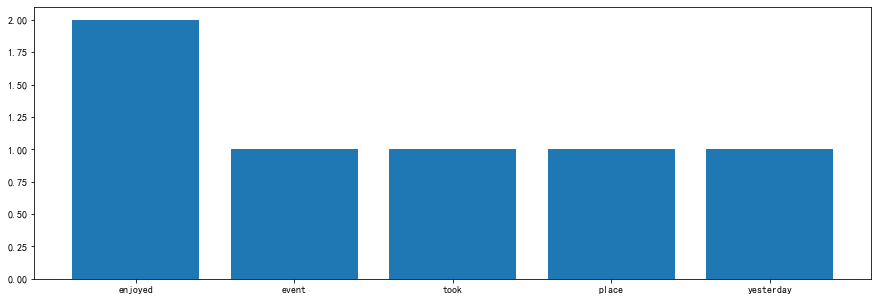

In [16]:
#英文demo
word_freq(text_fin,n=5)


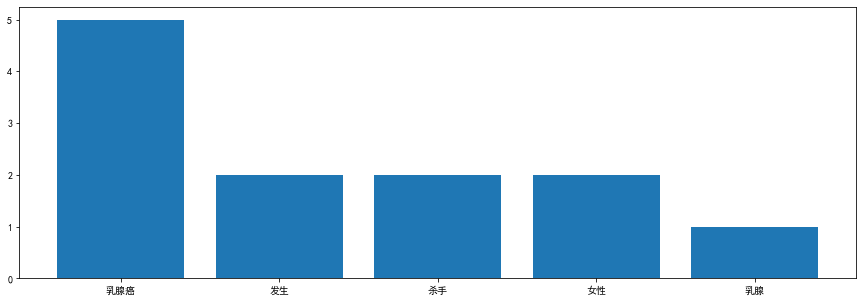

In [17]:
#中文demo
word_freq(fenci_con,n=5)

### 词云

In [6]:
' '.join(jieba.cut(a))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\zhouy217\AppData\Local\Temp\1\jieba.cache
Loading model cost 1.336 seconds.
Prefix dict has been built successfully.


'乳腺癌 是 乳腺 上皮细胞 在 多种 致癌 因子 的 作用 下 ， 发生 增殖 失控 的 现象 。 疾病 早期 常 表现 为 乳房 肿块 、 乳头 溢液 、 腋窝 淋巴结 肿大 等 症状 ， 晚期 可 因 癌细胞 发生 远处 转移 ， 出现 多 器官 病变 ， 直接 威胁 患者 的 生命 。 乳腺癌 常 被 称为 “ 粉红 杀手 ” ， 其 发病率 位居 女性 恶性肿瘤 的 首位 ， 男性 乳腺癌 较为 少见 。 随着 医疗 水平 的 提高 ， 乳腺癌 已 成为 疗效 最佳 的 实体肿瘤 之一 。 宫颈癌 和 乳腺癌 并称 女性 两大 “ 隐性 杀手 ” 。 结核病 是 由 结核 分枝杆菌 引起 的 慢性 传染病 ， 可 侵及 许多 脏器 ， 以 肺部 结核 感染 最为 常见 。 排菌者 为 其 重要 的 传染源 。 人体 感染 结核菌 后 不 一定 发病 ， 当 抵抗力 降低 或 细胞 介导 的 变态反应 增高 时 ， 才 可能 引起 临床 发病 。 若能 及时 诊断 ， 并予 合理 治疗 ， 大多 可 获 临床 痊愈 。'

In [1]:
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud
def word_cloud(text_content):
    # Load
    text = text_content
    # Tokenize
    text = ' '.join(jieba.cut(text))
    # WordCloud
    wc = WordCloud(max_words=2000,
                max_font_size=40,
                font_path='./fonts/simhei.ttf',
                background_color='white',
                random_state=42,
                relative_scaling=0)

    wc.generate(text)
    # Plot
    plt.figure()
    plt.axis('off')
    plt.imshow(wc)
    plt.show()


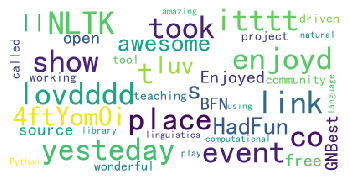

In [20]:
#英文demo
word_cloud(b)

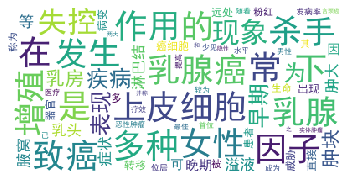

In [21]:
#中文demo
word_cloud(a)